In [19]:
import pandas as pd
df=pd.read_csv('AffordableRentalUnits.csv')
df=df.dropna()
df.head()

,Neighborhood,Building Address,For Current Vacancies and More Information,Number of Units Tracked,Bedroom Sizes,AMI Categories
0,Allston,8 Griggs Street,The Mount Vernon Company: 617.267.0006,2.0,1BR,80-100%
1,Allston,31 North Beacon Street,Carol Fiore: cfiore@78clean.com,3.0,"Studio, 1BR, 2BR",70%
2,Allston,40 Malvern Street,40Malvern@maloneyproperties.com,6.0,"1BR, 2BR",70%
3,Allston,450 Cambridge Street,Maloney Properties: 617.209.5406 450Cambridge@...,5.0,"1BR, 2BR",70%
4,Allston,1505\nCommonwealth Avenue,LBC Boston: 617.599.7261,10.0,"Studio, 1BR, 2BR",70%


In [20]:
for index,row in df.iterrows():
    if row["Number of Units Tracked"]<5:
        df=df.drop(index)
df.head(10)

,Neighborhood,Building Address,For Current Vacancies and More Information,Number of Units Tracked,Bedroom Sizes,AMI Categories
2,Allston,40 Malvern Street,40Malvern@maloneyproperties.com,6.0,"1BR, 2BR",70%
3,Allston,450 Cambridge Street,Maloney Properties: 617.209.5406 450Cambridge@...,5.0,"1BR, 2BR",70%
4,Allston,1505\nCommonwealth Avenue,LBC Boston: 617.599.7261,10.0,"Studio, 1BR, 2BR",70%
5,Allston,Continuum\n219 Western Avenue,Continuum@maloneyproperties.com,42.0,"Studio, 1BR, 2BR, 3BR",70%
6,Allston,The Eco Allston 75 Brainerd Road,National Development: 857.576.6160,14.0,"Studio, 1BR, 2BR",70%
7,Allston,The Edge 60–66 Brainerd Road,National Development: 857.576.6160,10.0,"Studio, 1BR, 2BR",70%
9,Allston,The Gateway 1298 & 1302\nCommonwealth Ave,Mount Vernon: 617.267.0006,8.0,"Studio, 1BR",70%
10,Allston,The Radius Apartments\n530 Western Avenue,Radius@maloneyproperties.com,17.0,"micro, studio, 1BD, 2BD",70%
11,Allston,Trac 75\n75 Braintree Street,Dolben: 617-539-7575\ntrac75@dolben com,11.0,"Studio, 1BR, 2BR, 3BR",70%
12,Back Bay,30 Dalton 30 Dalton Street,Bozzuto Management Co.: 617.302.9874,14.0,"1BR, 2BR",70%


In [35]:
def processAMICategories(categorieStr):
    categories=categorieStr.split(", ")
    sumAMI=0
    maxAMI=0
    size=0
    minAMI=1000
    for category in categories:
        category=category.replace(",","")
        category=category.replace("\n","")
        category=category.replace("-","%")
        ami=category.split("%")[:-1]
        for amiStr in ami:
            num=int(amiStr)
            maxAMI=max(num,maxAMI)
            minAMI=min(num,minAMI)
            sumAMI+=num
        size+=(len(ami))
    meanAMI=sumAMI/size
    return maxAMI,minAMI,meanAMI


maxAMI=[]
minAMI=[]
meanAMI=[]
for index,row in df.iterrows():
    maxV,minV,meanV=processAMICategories(row["AMI Categories"])
    maxAMI.append(maxV)
    minAMI.append(minV)
    meanAMI.append(meanV)
df["Max AMI"]=maxAMI
df["Min AMI"]=minAMI
df["Mean AMI"]=meanAMI
df=df.sort_values(by=["Max AMI","Number of Units Tracked"],ascending=[False,False])
df.head(10)

,Neighborhood,Building Address,For Current Vacancies and More Information,Number of Units Tracked,Bedroom Sizes,AMI Categories,Max AMI,Min AMI,Mean AMI
19,Brighton,St. Gabriel's Apartments\n159-201 Washington S...,StGabriels@maloneyproperties.com,83.0,"micro, studio, 1BR, 2BR, 3BR","70%, 150%",150,70,110.000000
48,East Boston,Portside @ East Pier Phase 2,Maloney Properties: 617.209.5406 Portside@malo...,43.0,"Studio, 1BR, 2BR","80%, 80-100%, 100-120%,\n120-150%",150,80,107.142857
47,East Boston,"Portside @ East Pier, 50 Lewis Street",Maloney Properties: 617.209.5406 Portside@malo...,26.0,"Studio, 1BR, 2BR","80%, 100%, 120%, 150%",150,80,112.500000
14,Back Bay,Avalon @ Prudential 780 Boylston Street,Avalon Communities: 617.536.9300,60.0,"Studio, 1BR, 2BR","65%, 65-80%, 80-100%, 100-120%",120,65,87.142857
36,Downtown,Archstone Boston Common\n660 Washington Street,Maloney Properties: 617.209.5406,46.0,"Studio, 1BR, 2BR, 3BR",80-120%,120,80,100.000000
59,Fenway,The Pierce,Maloney Properties: 617.209.5406 Pierce@malone...,41.0,"Studio, 1BR, 2BR, 3BR","70%, 80-120%",120,70,90.000000
57,Fenway,"Fenway Triangle 150 & 180 Brookline Avenue, 13...",Maloney Properties: 617.209.5406 FenwayTriangl...,41.0,"Studio, 1BR, 2BR","80%, 80-90%, 90-100%, 100-\n120%",120,80,94.285714
60,Fenway,Triangle Trilogy 180 Brookline Avenue,Maloney Properties: 617.209.5406,41.0,"Studio, 1BR, 2BR","80%, 80-90%, 90-100%, 100-\n120%",120,80,94.285714
62,Fenway,The Viridian\n1282 Boylston Street,Maloney Properties: 617.209.5406 Viridian@malo...,38.0,"Studio, 1BR, 2BR, 3BR","80%, 100%, 120%",120,80,100.000000
63,Fort Point,100 Pier 4\n100 Pier 4 Boulevard,UDR Management: 617.849.7433,32.0,"Studio, 1BR, 2BR","80%, 120%",120,80,100.000000


In [36]:
df=df.sort_values(by=["Min AMI","Number of Units Tracked"],ascending=[False,False])
df.head(10)

,Neighborhood,Building Address,For Current Vacancies and More Information,Number of Units Tracked,Bedroom Sizes,AMI Categories,Max AMI,Min AMI,Mean AMI
52,Fenway,1330 Boylston Street,Maloney Properties: 617.209.5406 1330Boylston@...,10.0,"1BR, 2BR",100%,100,100,100.000000
115,West End,Emerson Place 1 & 10 Emerson Place,Maloney Properties: 617.209.5406,19.0,"Studio, 1BR, 2BR",90%,90,90,90.000000
36,Downtown,Archstone Boston Common\n660 Washington Street,Maloney Properties: 617.209.5406,46.0,"Studio, 1BR, 2BR, 3BR",80-120%,120,80,100.000000
48,East Boston,Portside @ East Pier Phase 2,Maloney Properties: 617.209.5406 Portside@malo...,43.0,"Studio, 1BR, 2BR","80%, 80-100%, 100-120%,\n120-150%",150,80,107.142857
57,Fenway,"Fenway Triangle 150 & 180 Brookline Avenue, 13...",Maloney Properties: 617.209.5406 FenwayTriangl...,41.0,"Studio, 1BR, 2BR","80%, 80-90%, 90-100%, 100-\n120%",120,80,94.285714
60,Fenway,Triangle Trilogy 180 Brookline Avenue,Maloney Properties: 617.209.5406,41.0,"Studio, 1BR, 2BR","80%, 80-90%, 90-100%, 100-\n120%",120,80,94.285714
38,Downtown,AVA Theater DistriAVA Theater District\n45 Stu...,Avalon Communities: 857.350.4949,40.0,"Studio, 1BR, 2BR",80%,80,80,80.000000
62,Fenway,The Viridian\n1282 Boylston Street,Maloney Properties: 617.209.5406 Viridian@malo...,38.0,"Studio, 1BR, 2BR, 3BR","80%, 100%, 120%",120,80,100.000000
63,Fort Point,100 Pier 4\n100 Pier 4 Boulevard,UDR Management: 617.849.7433,32.0,"Studio, 1BR, 2BR","80%, 120%",120,80,100.000000
114,West End,Avalon North Station,Avalon Communities: 617.236.1369,30.0,"Studio, 1BR, 2BR, 3BR","80%, 80-120%",120,80,93.333333


In [58]:
df=df.sort_values(by=["Mean AMI","Number of Units Tracked"],ascending=[True,False])
df.head(5)

,Neighborhood,Building Address,For Current Vacancies and More Information,Number of Units Tracked,Bedroom Sizes,AMI Categories,Max AMI,Min AMI,Mean AMI
109,South End,James Court Apartments\n45 East Newton Street,Fulton Properties: 617.369.9400,9.0,"1BR, 2BR",60%,60,60,60.000000
88,Roxbury,"Douglass Park\n168 Camden Street,\n650 Columbu...",Maloney Properties: 617.209.5406 DouglassPark@...,35.0,"1BR, 2BR, 3BR","50%, 70%\n70%",70,50,63.333333
50,Fenway,142–148 Hemenway Street,R.M. Bradley & Company: 617.421.0732,15.0,"2BR, 3BR, 4BR","50%, 80%",80,50,65.000000
42,Downtown,The Sudbury,Bozzutto Management: 833.221.7315,63.0,"Studio, 1BR, 2BR, 3BR",70%,70,70,70.000000
91,Seaport,The Metlo (fka Nema Apartments)\n399 Congress ...,Maloney Properties: 617.209.5406 TheMetlo@malo...,54.0,"studio, 1BR, 2BR, 3BR",70%,70,70,70.000000


In [57]:
df=df.sort_values(by=["Mean AMI","Number of Units Tracked"],ascending=[False,False])
df.head(5)

,Neighborhood,Building Address,For Current Vacancies and More Information,Number of Units Tracked,Bedroom Sizes,AMI Categories,Max AMI,Min AMI,Mean AMI
47,East Boston,"Portside @ East Pier, 50 Lewis Street",Maloney Properties: 617.209.5406 Portside@malo...,26.0,"Studio, 1BR, 2BR","80%, 100%, 120%, 150%",150,80,112.500000
19,Brighton,St. Gabriel's Apartments\n159-201 Washington S...,StGabriels@maloneyproperties.com,83.0,"micro, studio, 1BR, 2BR, 3BR","70%, 150%",150,70,110.000000
48,East Boston,Portside @ East Pier Phase 2,Maloney Properties: 617.209.5406 Portside@malo...,43.0,"Studio, 1BR, 2BR","80%, 80-100%, 100-120%,\n120-150%",150,80,107.142857
36,Downtown,Archstone Boston Common\n660 Washington Street,Maloney Properties: 617.209.5406,46.0,"Studio, 1BR, 2BR, 3BR",80-120%,120,80,100.000000
62,Fenway,The Viridian\n1282 Boylston Street,Maloney Properties: 617.209.5406 Viridian@malo...,38.0,"Studio, 1BR, 2BR, 3BR","80%, 100%, 120%",120,80,100.000000


In [59]:
df=df.sort_values(by=["Max AMI","Number of Units Tracked"],ascending=[True,False])
df.head(5)

,Neighborhood,Building Address,For Current Vacancies and More Information,Number of Units Tracked,Bedroom Sizes,AMI Categories,Max AMI,Min AMI,Mean AMI
109,South End,James Court Apartments\n45 East Newton Street,Fulton Properties: 617.369.9400,9.0,"1BR, 2BR",60%,60,60,60.0
42,Downtown,The Sudbury,Bozzutto Management: 833.221.7315,63.0,"Studio, 1BR, 2BR, 3BR",70%,70,70,70.0
91,Seaport,The Metlo (fka Nema Apartments)\n399 Congress ...,Maloney Properties: 617.209.5406 TheMetlo@malo...,54.0,"studio, 1BR, 2BR, 3BR",70%,70,70,70.0
94,Seaport,VIA,Maloney Properties: 617.209.5406,50.0,"Studio, 1BR, 2BR, 3BR",70%,70,70,70.0
93,Seaport,The Benjamin,Maloney Properties: 617.209.5406,46.0,"Studio, 1BR, 2BR, 3BR",70%,70,70,70.0


In [60]:
df=df.sort_values(by=["Max AMI","Number of Units Tracked"],ascending=[False,False])
df.head(5)

,Neighborhood,Building Address,For Current Vacancies and More Information,Number of Units Tracked,Bedroom Sizes,AMI Categories,Max AMI,Min AMI,Mean AMI
19,Brighton,St. Gabriel's Apartments\n159-201 Washington S...,StGabriels@maloneyproperties.com,83.0,"micro, studio, 1BR, 2BR, 3BR","70%, 150%",150,70,110.000000
48,East Boston,Portside @ East Pier Phase 2,Maloney Properties: 617.209.5406 Portside@malo...,43.0,"Studio, 1BR, 2BR","80%, 80-100%, 100-120%,\n120-150%",150,80,107.142857
47,East Boston,"Portside @ East Pier, 50 Lewis Street",Maloney Properties: 617.209.5406 Portside@malo...,26.0,"Studio, 1BR, 2BR","80%, 100%, 120%, 150%",150,80,112.500000
14,Back Bay,Avalon @ Prudential 780 Boylston Street,Avalon Communities: 617.536.9300,60.0,"Studio, 1BR, 2BR","65%, 65-80%, 80-100%, 100-120%",120,65,87.142857
36,Downtown,Archstone Boston Common\n660 Washington Street,Maloney Properties: 617.209.5406,46.0,"Studio, 1BR, 2BR, 3BR",80-120%,120,80,100.000000


In [61]:
df=df.sort_values(by=["Min AMI","Number of Units Tracked"],ascending=[True,False])
df.head(5)

,Neighborhood,Building Address,For Current Vacancies and More Information,Number of Units Tracked,Bedroom Sizes,AMI Categories,Max AMI,Min AMI,Mean AMI
70,Jamaica Plain,MetroMark 3593-3615\nWashington Street,Corcoran Management: 617.541.1818,40.0,"Studio, 1BR, 2BR, 3BR","50%, 70%, 100%",100,50,73.333333
88,Roxbury,"Douglass Park\n168 Camden Street,\n650 Columbu...",Maloney Properties: 617.209.5406 DouglassPark@...,35.0,"1BR, 2BR, 3BR","50%, 70%\n70%",70,50,63.333333
50,Fenway,142–148 Hemenway Street,R.M. Bradley & Company: 617.421.0732,15.0,"2BR, 3BR, 4BR","50%, 80%",80,50,65.000000
72,Jamaica Plain,Bell Olmsted Park 161 South Huntington,"Bell Partners, Inc.: 833.882.2279",37.0,"Studio, 1BR, 2BR, 3BR","60%, 70%, 80%, 90%",90,60,75.000000
109,South End,James Court Apartments\n45 East Newton Street,Fulton Properties: 617.369.9400,9.0,"1BR, 2BR",60%,60,60,60.000000


In [62]:
df=df.sort_values(by=["Min AMI","Number of Units Tracked"],ascending=[False,False])
df.head(5)

,Neighborhood,Building Address,For Current Vacancies and More Information,Number of Units Tracked,Bedroom Sizes,AMI Categories,Max AMI,Min AMI,Mean AMI
52,Fenway,1330 Boylston Street,Maloney Properties: 617.209.5406 1330Boylston@...,10.0,"1BR, 2BR",100%,100,100,100.000000
115,West End,Emerson Place 1 & 10 Emerson Place,Maloney Properties: 617.209.5406,19.0,"Studio, 1BR, 2BR",90%,90,90,90.000000
36,Downtown,Archstone Boston Common\n660 Washington Street,Maloney Properties: 617.209.5406,46.0,"Studio, 1BR, 2BR, 3BR",80-120%,120,80,100.000000
48,East Boston,Portside @ East Pier Phase 2,Maloney Properties: 617.209.5406 Portside@malo...,43.0,"Studio, 1BR, 2BR","80%, 80-100%, 100-120%,\n120-150%",150,80,107.142857
57,Fenway,"Fenway Triangle 150 & 180 Brookline Avenue, 13...",Maloney Properties: 617.209.5406 FenwayTriangl...,41.0,"Studio, 1BR, 2BR","80%, 80-90%, 90-100%, 100-\n120%",120,80,94.285714


<AxesSubplot:xlabel='Neighborhood'>

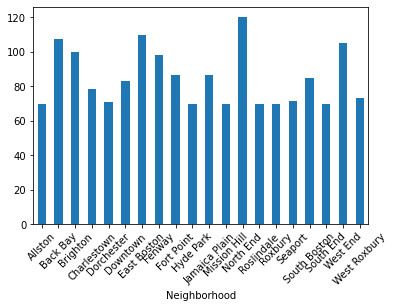

In [55]:
NeighborhoodMaxAMI=df.groupby("Neighborhood")["Max AMI"].mean()
NeighborhoodMaxAMI.plot.bar(rot=45)

<AxesSubplot:xlabel='Neighborhood'>

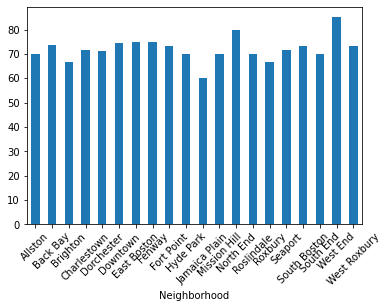

In [63]:
NeighborhoodMaxAMI=df.groupby("Neighborhood")["Min AMI"].mean()
NeighborhoodMaxAMI.plot.bar(rot=45)

<AxesSubplot:xlabel='Neighborhood'>

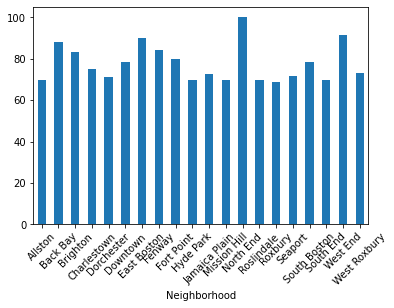

In [64]:
NeighborhoodMaxAMI=df.groupby("Neighborhood")["Mean AMI"].mean()
NeighborhoodMaxAMI.plot.bar(rot=45)